In [1]:
# !pip install torch torchvision
!pip install torch-lucent

# Neural Networks

Neural networks are a powerful class of machine learning algorithms that are inspired by the structure and function of the human brain. They are used to recognize patterns and make predictions based on complex datasets. Neural networks consist of interconnected nodes, or "neurons", which are organized into layers. Each neuron receives input signals from other neurons, processes the information, and then sends output signals to other neurons in the next layer of the network. By adjusting the strength of the connections between neurons, neural networks can learn to perform a variety of tasks, such as image recognition, natural language processing, and predictive modeling. With recent advancements in hardware and software, neural networks have become increasingly popular and have been applied to a wide range of industries, including healthcare, finance, and entertainment.

<img src="https://github.com/ficstamas/FateML/raw/master/notebooks/images/neural_nerwork.png" width="500px">

__Interpretation of Neural Networks are HARD__

Neural networks (NNs) can be difficult to interpret because of their complex and nonlinear nature. While they can be very effective at recognizing patterns and making predictions, the way they arrive at those conclusions is often not easily understandable by humans.

One of the reasons for this is the large number of parameters involved in a typical NN. Depending on the size and complexity of the network, there can be millions or even billions of individual weights and biases that determine the behavior of the network. It can be challenging to determine which of these parameters are most important and how they contribute to the network's output.

Additionally, NNs often involve multiple layers of abstraction, where each layer learns to represent higher-level features based on the lower-level features learned by the previous layer. This hierarchical structure can make it difficult to understand how the network is processing the input data and arriving at its final output.

__Interpretation of Neural Networks__

We can certainly use the already discussed model agnostic approaches, but don't forget each method's advantage/disadvantage while employing them. Their are a few more concrate reason about why we shouldn't use them: 
- neural networks learn features and concepts in their hidden layers and we need special tools to uncover them
- the gradient can be utilized to implement interpretation methods that are more computationally efficient than model-agnostic methods
- most of the model-agnostic discussed methods so far are intended for the interpretation of models for tabular data. Image and text data require different methods

# Image Processing with NNs

Classical image processing usually relies on pre-calculated static image features. However with the introduction of AlexNet a new wave of research emerged where we let a deep neural network to learn the neccesary features.

## Convolutional Neural Networks (CNNs)

The backbone of CNNs (e.g. AlexNet) consists of convolutional kernels. A convolution kernel, also known as a filter, is a small matrix of numbers that is used to perform a convolution operation on an image or signal. The kernel is a sliding window that moves across the input data, and at each position, it performs a mathematical operation on the local data to produce a new output value. Usually followed by a non-linear activation and a pooling layer. This helps CNNs to capture higher level hierarchical relations with each layer.

<img src="https://github.com/ficstamas/FateML/raw/master/notebooks/images/cnn.webp">

## Let's build AlexNet

In the end we are going to use a pre-trained model.

In [2]:
import torch.nn as nn


class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 192, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(192),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2
                        ))
        self.layer3 = nn.Sequential(
            nn.Conv2d(192, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2)
        )
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU()
        )
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU()
        )
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes)
        )
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [3]:
# Loading the pretrained model

import torch

model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
# model = model.cuda()
model.eval()

Using cache found in C:\Users\ftkni/.cache\torch\hub\pytorch_vision_v0.10.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### Preprocessing Pipeline

In [4]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),  # resize
    transforms.CenterCrop(224),  # crop the center
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # normalize channels (RGB pixel values)
])

# for a single instance
preprocess_instance = lambda x: preprocess(x).unsqueeze(0)  # we have to reshape it as a batch

### Evalueate the model

In [5]:
# Download an example image from the pytorch website
import urllib

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")

def download(url, filename):
    try: 
        urllib.URLopener().retrieve(url, filename)
    except: 
        urllib.request.urlretrieve(url, filename)
        
download(url, filename)

In [6]:
from PIL import Image

input_image = Image.open(filename)
input_batch = preprocess_instance(input_image)

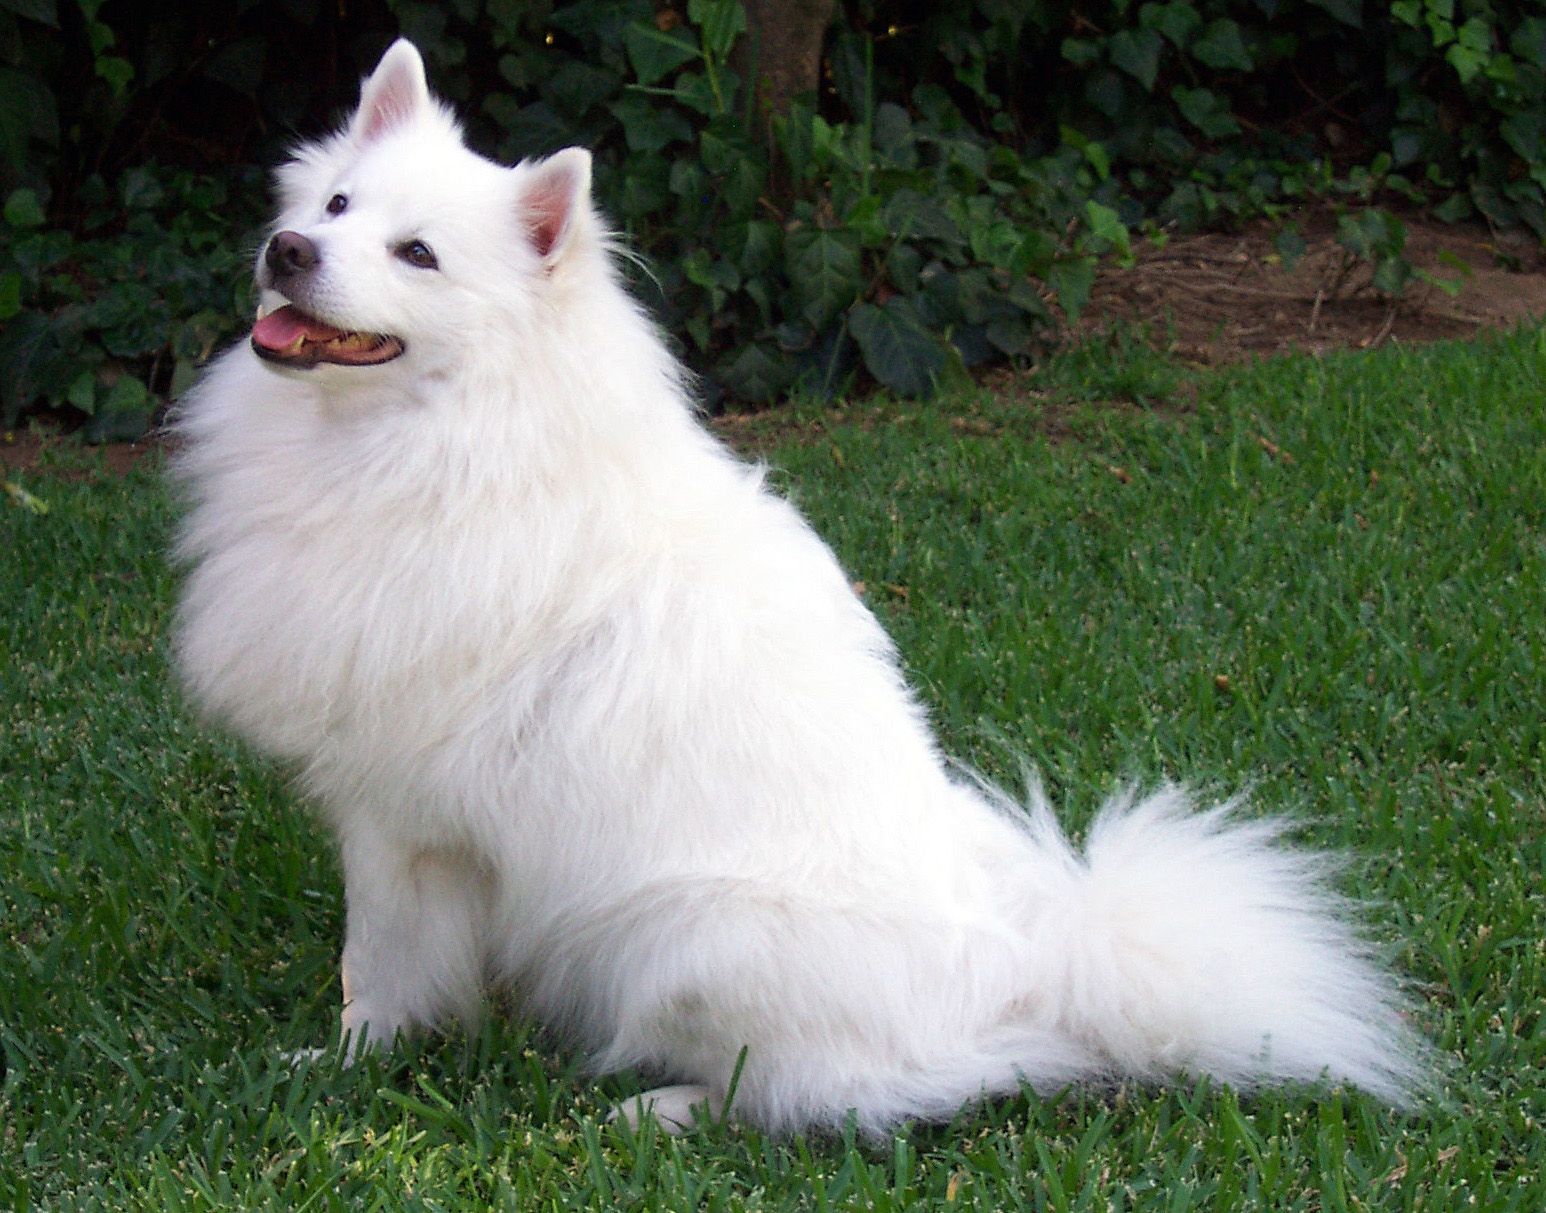

In [7]:
display(input_image)

In [8]:
input_batch

tensor([[[[-1.9295, -1.9295, -1.9124,  ..., -2.0323, -1.9467, -1.9295],
          [-1.9980, -1.8953, -1.9124,  ..., -1.9638, -1.9295, -1.7754],
          [-1.9980, -1.9467, -1.9124,  ..., -2.0494, -1.9638, -1.8953],
          ...,
          [-1.4843, -1.6042, -1.6213,  ..., -0.8678, -1.1075, -1.0733],
          [-1.5357, -1.6042, -1.6213,  ..., -1.0390, -1.6213, -1.4500],
          [-1.5528, -1.4843, -1.2445,  ..., -0.9192, -1.2788, -1.2617]],

         [[-1.8256, -1.8256, -1.8081,  ..., -1.9832, -1.9132, -1.9132],
          [-1.8256, -1.8431, -1.8431,  ..., -1.9657, -1.9307, -1.8782],
          [-1.8256, -1.8431, -1.8606,  ..., -1.9657, -1.9482, -1.9132],
          ...,
          [-0.9853, -0.9678, -0.9853,  ..., -0.4601, -0.6352, -0.6702],
          [-0.9853, -0.9853, -1.0028,  ..., -0.5651, -1.1253, -0.8978],
          [-0.9503, -0.9853, -0.8102,  ..., -0.3901, -0.8102, -0.7402]],

         [[-1.6127, -1.5953, -1.5604,  ..., -1.7173, -1.6999, -1.7173],
          [-1.6650, -1.6302, -

In [9]:
with torch.no_grad():
    output = model(input_batch)

In [10]:
output.shape

torch.Size([1, 1000])

In [11]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)

In [12]:
download("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")

In [13]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [14]:
categories[:10]

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

In [15]:
top5_prob, top5_catid = torch.topk(probabilities, 5)
top5_prob, top5_catid

(tensor([0.7245, 0.1394, 0.0587, 0.0228, 0.0125]),
 tensor([258, 104, 259, 332, 279]))

In [16]:
for i, id_ in enumerate(top5_catid):
    print(f"{categories[id_]} with probablity of {top5_prob[i]}")

Samoyed with probablity of 0.7244763374328613
wallaby with probablity of 0.13937856256961823
Pomeranian with probablity of 0.05874991416931152
Angora with probablity of 0.022829914465546608
Arctic fox with probablity of 0.012450180016458035


# Learned Features

CNNs internally learn increasingly complex features:

- The first convolutional layer(s) learn features such as edges and simple textures.
- Later convolutional layers learn features such as more complex textures and patterns.
- The last convolutional layers learn features such as objects or parts of objects.
- The fully connected layers learn to connect the activations from the high-level features to the individual classes to be predicted.

## Feature Vizualization

Thats nice and everything but can we see these features?

Actually there are several approaches to achieve it. Feature visualization for a "unit" of a neural network is done by finding the input that maximizes the activation of that "unit". A Unit can refer to several part of the neural network, such as convolution neuron (A), convolution channel (B), convolution layer (C), neuron (D), hidden layer (E) or class probability (F).

<img src="https://github.com/ficstamas/FateML/raw/master/notebooks/images/viz_units.jpg" width=600>

In [17]:
from lucent.modelzoo.util import get_model_layers
from lucent.optvis import render, param, transform, objectives

get_model_layers(model)

['features',
 'features_0',
 'features_1',
 'features_2',
 'features_3',
 'features_4',
 'features_5',
 'features_6',
 'features_7',
 'features_8',
 'features_9',
 'features_10',
 'features_11',
 'features_12',
 'avgpool',
 'classifier',
 'classifier_0',
 'classifier_1',
 'classifier_2',
 'classifier_3',
 'classifier_4',
 'classifier_5',
 'classifier_6']

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:20<00:00, 24.65it/s]



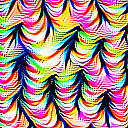

In [18]:
obj = objectives.channel("features_3", 102)
_ = render.render_vis(model, obj, show_inline=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:27<00:00, 18.78it/s]



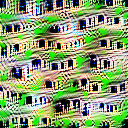

In [19]:
obj = objectives.channel("features_6", 102)
_ = render.render_vis(model, obj, show_inline=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:25<00:00, 19.80it/s]



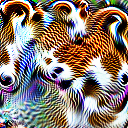

In [20]:
obj = objectives.channel("features_10", 102)
_ = render.render_vis(model, obj, show_inline=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:25<00:00, 20.06it/s]



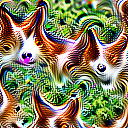

In [21]:
channel = lambda n: objectives.channel("features_10", n)
obj = channel(100) + channel(101) + channel(102)
_ = render.render_vis(model, obj, show_inline=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 512/512 [00:27<00:00, 18.58it/s]



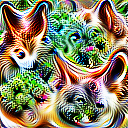

In [22]:
channel = lambda n: objectives.channel("features_12", n)
obj = channel(100) + channel(101) + channel(102)
_ = render.render_vis(model, obj, show_inline=True)

### Feature Inversion

In [23]:
# a dot product objective, to maximize the cosine similarity between the feature representations of a parameterized input and the target image
@objectives.wrap_objective()
def dot_compare(layer, batch=1, cossim_pow=0):
    def inner(T):
        dot = (T(layer)[batch] * T(layer)[0]).sum()
        mag = torch.sqrt(torch.sum(T(layer)[0]**2))
        cossim = dot/(1e-6 + mag)
        return -dot * cossim ** cossim_pow
    return inner

In [24]:
import numpy as np
from lucent.misc.io import show


def feature_inversion(img, layer=None, n_steps=512, cossim_pow=0.0):
    # Convert image to torch.tensor and scale image
    img = preprocess(img)

    obj = objectives.Objective.sum([
        1.0 * dot_compare(layer, cossim_pow=cossim_pow),
        objectives.blur_input_each_step(),
    ])

    # Initialize parameterized input and stack with target image
    # to be accessed in the objective function
    params, image_f = param.image(224)
    def stacked_param_f():
        return params, lambda: torch.stack([image_f()[0], img])

    transforms = [
        transform.pad(8, mode='constant', constant_value=.5),
        transform.jitter(8),
        transform.random_scale([0.9, 0.95, 1.05, 1.1] + [1]*4),
        transform.random_rotate(list(range(-5, 5)) + [0]*5),
        transform.jitter(2),
    ]

    _ = render.render_vis(model, obj, stacked_param_f, transforms=transforms, thresholds=(n_steps,), show_image=False, progress=False)

    show(_[0][0])

In [25]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

features_0



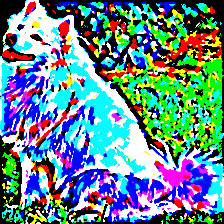


features_1



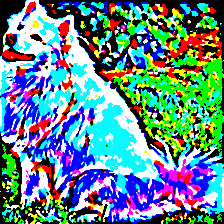


features_2



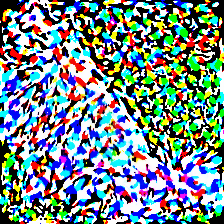


features_3



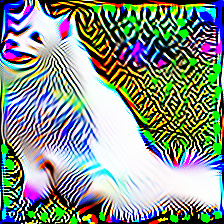


features_6



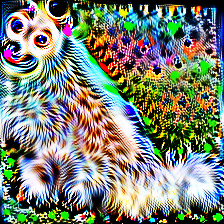


features_8



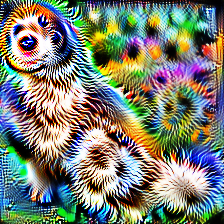


features_10



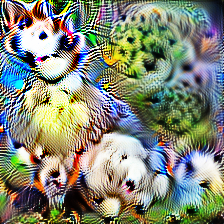


features_12



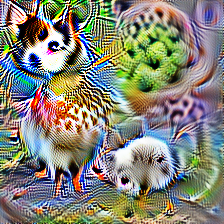


avgpool



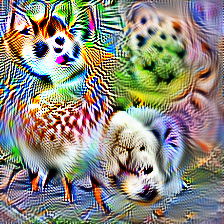


classifier_1



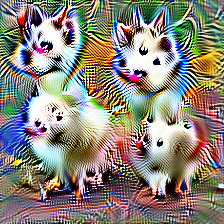


classifier_4



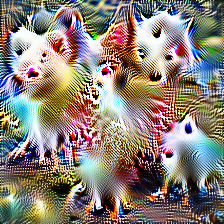


classifier_6



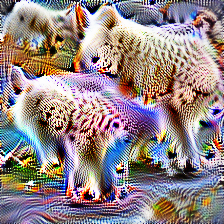

In [26]:
layers = [
     'features_0',
     'features_1',
     'features_2',
     'features_3',
     'features_6',
     'features_8',
     'features_10',
     'features_12',
     'avgpool',
     'classifier_1',
     'classifier_4',
     'classifier_6'
]

for layer in layers:
    print(layer)
    feature_inversion(input_image, layer=layer)
    print()